In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Set up matplotlib style 
plt.style.use('ggplot')

In [4]:
# Libraries for wordcloud making and image importing
from wordcloud import WordCloud, ImageColorGenerator
from PIL import Image

In [5]:
# And libraries for data transformation
import datetime
from string import punctuation

In [8]:
# Import data and transform tsv file
data = pd.read_csv('data/amazon_alexa.tsv', delimiter='\t')

In [9]:
# Data overlook
data.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


### Text Preprocessing
Since there are some difference between the ways people put reviews, I will do some transform before the analyis.

In [10]:
# Transform string data and remove punctuation
data['verified_reviews'] = data.verified_reviews.apply(lambda x: x.lower())
data['verified_reviews'] = data.verified_reviews.apply(lambda x: ''.join([c for c in x if c not in punctuation]))

In [11]:
# Get length of review for EDA
data['review_length'] = data.verified_reviews.apply(lambda x: len(x))

In [12]:
# Check the data again
data.head()

,rating,date,variation,verified_reviews,feedback,review_length
0,5,31-Jul-18,Charcoal Fabric,love my echo,1,12
1,5,31-Jul-18,Charcoal Fabric,loved it,1,8
2,4,31-Jul-18,Walnut Finish,sometimes while playing a game you can answer ...,1,192
3,5,31-Jul-18,Charcoal Fabric,i have had a lot of fun with this thing my 4 y...,1,168
4,5,31-Jul-18,Charcoal Fabric,music,1,5


In [13]:
# Take a look at the mean, standard deviation, and maximum
print('The mean for the length of review:',data['review_length'].mean())
print('The standard deviation for the length of reviews:',data['review_length'].std())
print('The maximum for the length of reviews:',data['review_length'].max())

('The mean for the length of review:', 128.61269841269842)
('The standard deviation for the length of reviews:', 177.73881013307388)
('The maximum for the length of reviews:', 2730)


Text(0.5,1,u'Distribution of review length')

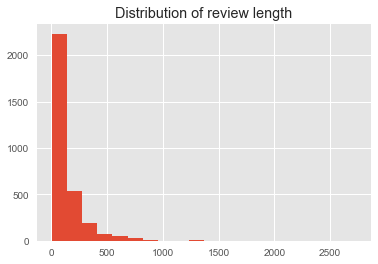

In [14]:
# And take a look at the distribution of the length
data['review_length'].hist(bins=20)
plt.title('Distribution of review length')

In [15]:
# Transform date to datetime data type
data['date'] = data.date.apply(lambda x:  datetime.datetime.strptime(x, '%d-%b-%y'))

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 6 columns):
rating              3150 non-null int64
date                3150 non-null datetime64[ns]
variation           3150 non-null object
verified_reviews    3150 non-null object
feedback            3150 non-null int64
review_length       3150 non-null int64
dtypes: datetime64[ns](1), int64(3), object(2)
memory usage: 147.7+ KB


In [19]:
A = np.array(Image.open('amazon-logo/amazon-logo-white.png'))

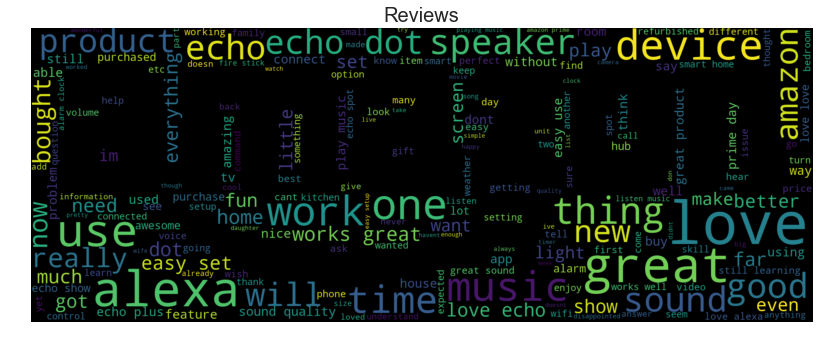

In [20]:
np.random.seed(321)
sns.set(rc={'figure.figsize':(14,8)})
reviews = ' '.join(data['verified_reviews'].tolist())

wordcloud = WordCloud(mask=A,background_color="black").generate(reviews)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.margins(x=0, y=0)
plt.title('Reviews',size=20)
plt.show()

I can see that some normal words ans some positive reviews.
For positive parts, I saw:

1)love/new

2)works great/better/good

Text(0.5,1,u'Counts of each variation')

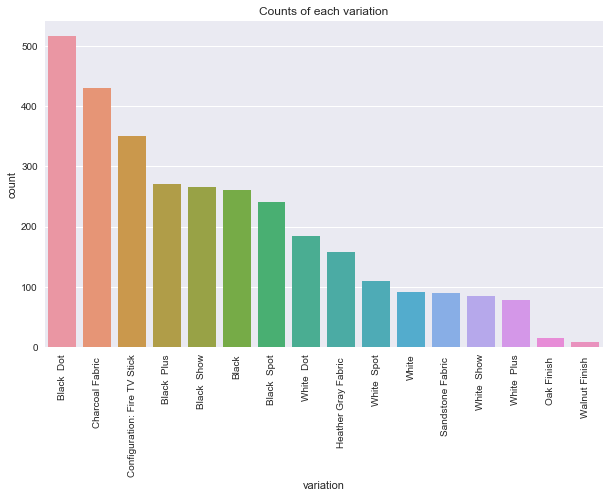

In [21]:
sns.set(rc={'figure.figsize':(10,6)})
sns.countplot(data.variation,
              order = data['variation'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Counts of each variation')

In [22]:
data.rating.value_counts()

5    2286
4     455
1     161
3     152
2      96
Name: rating, dtype: int64

In [23]:
data5 = data[data.rating == 5]
data_not_5 = data[data.rating != 5]
data1 = data[data.rating == 1]

In [24]:
pd.options.display.max_colwidth = 200

data5[data5['verified_reviews'].str.contains('prime')]['verified_reviews'][:3]

39    this is my first digital assistant so im giving this a good review speaker is really good for the cheap price on prime day fun to play with and can be used as an alarm clock thats what i was going...
89                                                                                 works great but i dont think amazon should charge another cent for unlimited music when you 1 have prime and 2 buy an echo
94    love it i was thinking about getting one and when the prime day discount was offered i could not pass it up its fun to ask alexa to play any song or group and she comes up with a playlist from ama...
Name: verified_reviews, dtype: object

In [25]:
data5[data5['verified_reviews'].str.contains('time ')]['verified_reviews'][:3]

12     i purchased this for my mother who is having knee problems now to give her something to do while trying to over come not getting around so fast like she didshe enjoys all the little and big things...
94     love it i was thinking about getting one and when the prime day discount was offered i could not pass it up its fun to ask alexa to play any song or group and she comes up with a playlist from ama...
140    i have had for only a week so i am still learning all that alexa can do  it is a learning process  i love the music i can call up any time  i listen to podcasts and radio stations  i have just sta...
Name: verified_reviews, dtype: object

In [26]:
data5[data5['verified_reviews'].str.contains('easy')]['verified_reviews'][:3]

11    i love it learning knew things with it eveyday still figuring out how everything works but so far its been easy to use and understand she does make me laugh at times
16                                                                                                        really happy with this purchase  great speaker and easy to set up
26                        i love my echo its easy to operate loads of funit is everything as advertised i use it mainly to play my favorite tunes and test alexas knowledge
Name: verified_reviews, dtype: object

In [27]:
data1[data1['verified_reviews'].str.contains('useless')]['verified_reviews'][:3]

531     this is the worst amazon purchase i have made i am big amazon fanlove the brandunlimited digital musicprime videoseven buy my online games music and movies through amazon this app i have tried to ...
579                                                                                               great product but useless overall too many unnecessary features unless you have a smart home you dont need it
1209    this product currently has two related software flaws that make it completely unusable1 there is a 34card34 on the homescreen called 34things to try34  its an ad for other alexa services you can t...
Name: verified_reviews, dtype: object

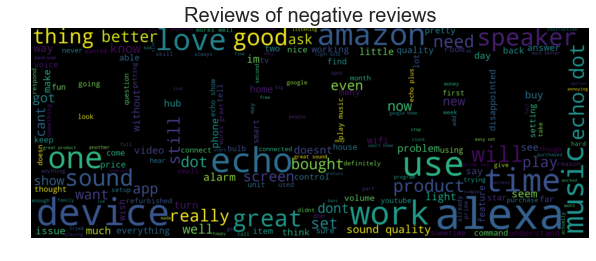

In [28]:
reviews = ' '.join(data_not_5['verified_reviews'].tolist())

wordcloud = WordCloud(mask=A,background_color="black").generate(reviews)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.margins(x=0, y=0)
plt.title('Reviews of negative reviews',size=20)
plt.show()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text xticklabel objects>)

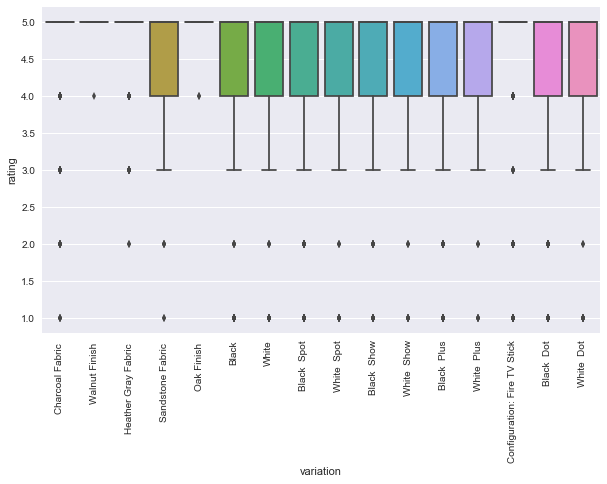

In [29]:
sns.boxplot(data.variation, data.rating)
plt.xticks(rotation = 90)

In [31]:
data.head()

,rating,date,variation,verified_reviews,feedback,review_length
0,5,2018-07-31,Charcoal Fabric,love my echo,1,12
1,5,2018-07-31,Charcoal Fabric,loved it,1,8
2,4,2018-07-31,Walnut Finish,sometimes while playing a game you can answer a question correctly but alexa says you got it wrong and answers the same as you i like being able to turn lights on and off while away from home,1,192
3,5,2018-07-31,Charcoal Fabric,i have had a lot of fun with this thing my 4 yr old learns about dinosaurs i control the lights and play games like categories has nice sound when playing music as well,1,168
4,5,2018-07-31,Charcoal Fabric,music,1,5


In [32]:
data_date = data.groupby('date').count()

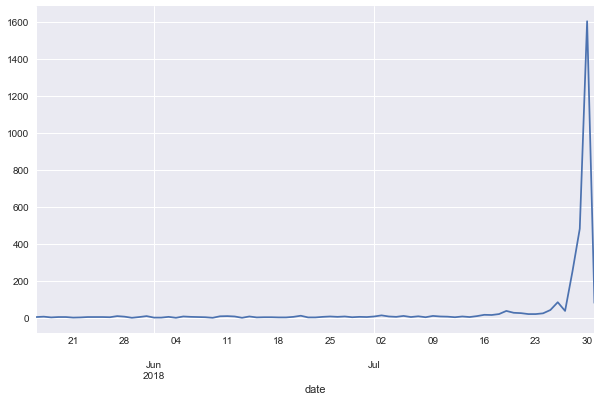

In [33]:
data_date.rating.plot()

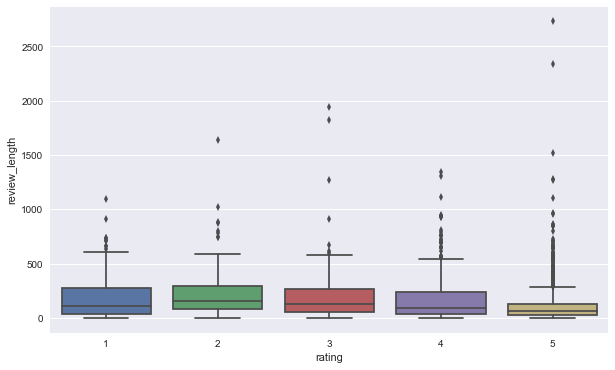

In [35]:
sns.boxplot('rating','review_length',data=data)

In [36]:
data['log_review_length'] = data.review_length.apply(lambda x: (np.log(x)+1))

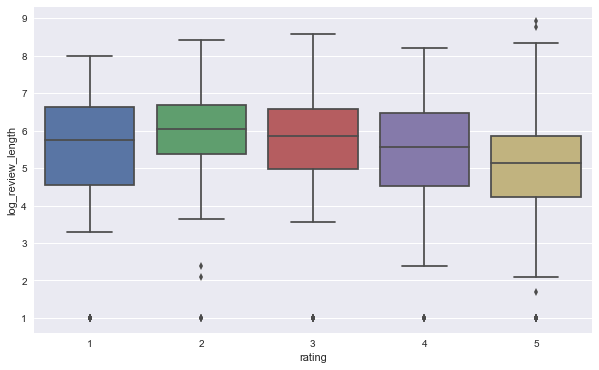

In [37]:
sns.boxplot('rating','log_review_length',data=data)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text xticklabel objects>)

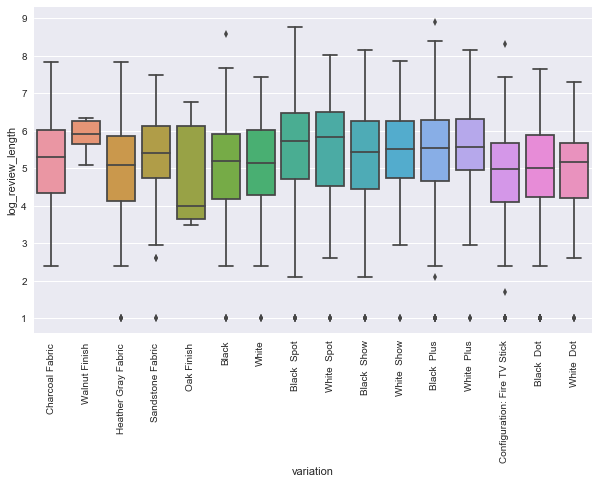

In [38]:
sns.boxplot('variation','log_review_length',data=data)
plt.xticks(rotation = 90)

## Counter

In [39]:
from collections import Counter

text = ' '.join(data['verified_reviews'].tolist())
review_word = text.split(' ')
all_reviews = ' '.join(review_word)
words = all_reviews.split()

# words wrong datatype
counts = Counter(words)
vocab = sorted(counts, key=counts.get, reverse=True)
vocab_to_int = {word: ii for ii, word in enumerate(vocab, 1)}

reviews_ints = []
for review in review_word:
    reviews_ints.append([vocab_to_int[word] for word in review.split()])

In [40]:
print('Unique words: ', len((vocab_to_int)))

('Unique words: ', 4613)


In [41]:
counts.most_common(20)

[('the', 3245),
 ('i', 2952),
 ('to', 2821),
 ('it', 2550),
 ('and', 2219),
 ('a', 1503),
 ('my', 1390),
 ('is', 1218),
 ('for', 1061),
 ('love', 951),
 ('echo', 825),
 ('this', 823),
 ('with', 786),
 ('of', 766),
 ('have', 753),
 ('great', 717),
 ('in', 653),
 ('that', 651),
 ('but', 634),
 ('alexa', 586)]

In [42]:
data1['rating'].value_counts()

1    161
Name: rating, dtype: int64

In [43]:
text1 = ' '.join(data1['verified_reviews'].tolist())
review_word1 = text1.split(' ')
all_reviews1 = ' '.join(review_word1)
words1 = all_reviews1.split()

# words wrong datatype
counts1 = Counter(words1)
vocab1 = sorted(counts1, key=counts1.get, reverse=True)
vocab_to_int1 = {word: ii for ii, word in enumerate(vocab1, 1)}

reviews_ints1 = []
for review in review_word1:
    reviews_ints1.append([vocab_to_int1[word] for word in review.split()])

In [44]:
counts1.most_common(20)

[('the', 261),
 ('i', 202),
 ('to', 198),
 ('it', 172),
 ('and', 152),
 ('a', 123),
 ('is', 85),
 ('not', 83),
 ('this', 77),
 ('of', 71),
 ('for', 64),
 ('have', 60),
 ('my', 58),
 ('that', 53),
 ('you', 51),
 ('in', 49),
 ('on', 49),
 ('echo', 49),
 ('with', 46),
 ('amazon', 43)]

## Spacy
I will implement Spacy from here. This is a NLP library

In [46]:
data1 = pd.read_csv('data/amazon_alexa.tsv', delimiter='\t')

In [60]:
import spacy
nlp = spacy.load('en')

def explain_text_entities(text):
    doc = nlp(text)
    for ent in doc.ents:
        print('Entity: {ent}, Label: {ent.label_}, {spacy.explain(ent.label_)}')

In [61]:
for i in range(15,20):
    one_sentence = data1['verified_reviews'][i]
    doc = nlp(one_sentence)
    spacy.displacy.render(doc, style='ent',jupyter=True)

TypeError: Argument 'string' has incorrect type (expected unicode, got str)

In [62]:
for i in ['en_core_web_sm','en_core_web_lg']:
    nlp = spacy.load(i)
    print('This is model:',i)
    for i in range(17,22):
        one_sentence = data1['verified_reviews'][i]
        doc = nlp(one_sentence)
        spacy.displacy.render(doc, style='ent',jupyter=True)



    Only loading the 'en' tokenizer.

('This is model:', 'en_core_web_sm')


TypeError: Argument 'string' has incorrect type (expected unicode, got str)

## Modeling

In [63]:
data.head()

,rating,date,variation,verified_reviews,feedback,review_length,log_review_length
0,5,2018-07-31,Charcoal Fabric,love my echo,1,12,3.484907
1,5,2018-07-31,Charcoal Fabric,loved it,1,8,3.079442
2,4,2018-07-31,Walnut Finish,sometimes while playing a game you can answer a question correctly but alexa says you got it wrong and answers the same as you i like being able to turn lights on and off while away from home,1,192,6.257495
3,5,2018-07-31,Charcoal Fabric,i have had a lot of fun with this thing my 4 yr old learns about dinosaurs i control the lights and play games like categories has nice sound when playing music as well,1,168,6.123964
4,5,2018-07-31,Charcoal Fabric,music,1,5,2.609438


In [64]:
data['positive'] = 0
data.loc[data['rating'] ==5, 'positive'] = 1

y = data['positive']

## preprocessing

In [65]:
from nltk.tokenize import word_tokenize 

word_tokenize(data.verified_reviews[0])

['love', 'my', 'echo']

In [66]:
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 

stop_words = set(stopwords.words('english')) 

data['cleaned_reviews'] = data.verified_reviews.apply(lambda x: word_tokenize(x))

data['cleaned_reviews'] = data.cleaned_reviews.apply(lambda x: [w for w in x if w not in stop_words])

data['cleaned_reviews'] = data.cleaned_reviews.apply(lambda x: ' '.join(x))

In [67]:
data.head()

,rating,date,variation,verified_reviews,feedback,review_length,log_review_length,positive,cleaned_reviews
0,5,2018-07-31,Charcoal Fabric,love my echo,1,12,3.484907,1,love echo
1,5,2018-07-31,Charcoal Fabric,loved it,1,8,3.079442,1,loved
2,4,2018-07-31,Walnut Finish,sometimes while playing a game you can answer a question correctly but alexa says you got it wrong and answers the same as you i like being able to turn lights on and off while away from home,1,192,6.257495,0,sometimes playing game answer question correctly alexa says got wrong answers like able turn lights away home
3,5,2018-07-31,Charcoal Fabric,i have had a lot of fun with this thing my 4 yr old learns about dinosaurs i control the lights and play games like categories has nice sound when playing music as well,1,168,6.123964,1,lot fun thing 4 yr old learns dinosaurs control lights play games like categories nice sound playing music well
4,5,2018-07-31,Charcoal Fabric,music,1,5,2.609438,1,music


In [68]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 9 columns):
rating               3150 non-null int64
date                 3150 non-null datetime64[ns]
variation            3150 non-null object
verified_reviews     3150 non-null object
feedback             3150 non-null int64
review_length        3150 non-null int64
log_review_length    3150 non-null float64
positive             3150 non-null int64
cleaned_reviews      3150 non-null object
dtypes: datetime64[ns](1), float64(1), int64(4), object(3)
memory usage: 221.6+ KB


In [69]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

X_train, X_test, y_train, y_test = train_test_split(data["verified_reviews"], y, test_size=0.33
                                    ,random_state=53)

# Initialize a CountVectorizer object: count_vectorizer
count_vectorizer = CountVectorizer(stop_words="english")

# Transform the training data using only the 'text' column values: count_train 
count_train = count_vectorizer.fit_transform(X_train)

y_train = np.asarray(y_train.values)

ch2 = SelectKBest(chi2, k = 300)

X_new = ch2.fit_transform(count_train, y_train)

# Transform the test data using only the 'text' column values: count_test 
count_test = count_vectorizer.transform(X_test)

X_test_new = ch2.transform(X=count_test)

In [70]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize a TfidfVectorizer object: tfidf_vectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words="english", max_df=0.7)

# Transform the training data: tfidf_train 
tfidf_train = tfidf_vectorizer.fit_transform(X_train)

# Transform the test data: tfidf_test 
tfidf_test = tfidf_vectorizer.transform(X_test)

In [71]:
# Create the CountVectorizer DataFrame: count_df
count_df = pd.DataFrame(count_train.A, columns=count_vectorizer.get_feature_names())

# Create the TfidfVectorizer DataFrame: tfidf_df
tfidf_df = pd.DataFrame(tfidf_train.A, columns=tfidf_vectorizer.get_feature_names())

# Print the head of count_df
print(count_df.head())

# Print the head of tfidf_df
print(tfidf_df.head())

# Calculate the difference in columns: difference
difference = set(count_df.columns) - set(tfidf_df.columns)
print(difference)

# Check whether the DataFrames are equal
print(count_df.equals(tfidf_df))

   10  100  1000  100x  1010  11  1100sf  15  150  19   ...     youtubeit  \
0   0    0     0     0     0   0       0   0    0   0   ...             0   
1   0    0     0     0     0   0       0   0    0   0   ...             0   
2   0    0     0     0     0   0       0   0    0   0   ...             0   
3   0    0     0     0     0   0       0   0    0   0   ...             0   
4   0    0     0     0     0   0       0   0    0   0   ...             0   

   youtubes  yr  yrs  yup  zero  zigbee  zonkedout  zwave  zzzzzzz  
0         0   0    0    0     0       0          0      0        0  
1         0   0    0    0     0       0          0      0        0  
2         0   0    0    0     0       0          0      0        0  
3         0   0    0    0     0       0          0      0        0  
4         0   0    0    0     0       0          0      0        0  

[5 rows x 3503 columns]
    10  100  1000  100x  1010   11  1100sf   15  150   19   ...     youtubeit  \
0  0.0  0.0   0.0

In [72]:
# Import the necessary modules
from sklearn import metrics
from sklearn.naive_bayes import MultinomialNB


# Instantiate a Multinomial Naive Bayes classifier: nb_classifier
nb_classifier = MultinomialNB()

# Fit the classifier to the training data
nb_classifier.fit(X_new, y_train)

# Create the predicted tags: pred
pred = nb_classifier.predict(X_test_new)

# Calculate the accuracy score: score
score = metrics.accuracy_score(y_test, pred)
print('Accuracy is:',score)
f1 = metrics.f1_score(y_test, pred)
print('F score is:',f1)

('Accuracy is:', 0.8057692307692308)
('F score is:', 0.8735919899874843)


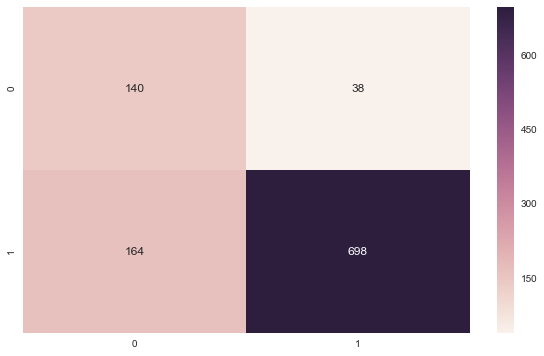

In [73]:
sns.heatmap(metrics.confusion_matrix(pred,y_test),annot=True,fmt='2.0f')

In [74]:
# Create a Multinomial Naive Bayes classifier: nb_classifier
nb_classifier = MultinomialNB()

# Fit the classifier to the training data
nb_classifier.fit(tfidf_train,y_train)

# Create the predicted tags: pred
pred = nb_classifier.predict(tfidf_test)

# Calculate the accuracy score: score
score = metrics.accuracy_score(y_test, pred)
print('Accuracy is:',score)
f1 = metrics.f1_score(y_test, pred)
print('F score is:',f1)

('Accuracy is:', 0.7298076923076923)
('F score is:', 0.8397033656588705)


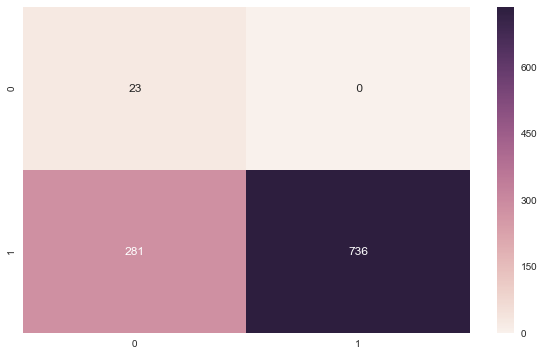

In [75]:
sns.heatmap(metrics.confusion_matrix(pred,y_test),annot=True,fmt='2.0f')

In [76]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()
# Fit the classifier to the training data
clf.fit(X_new, y_train)

# Create the predicted tags: pred
pred = clf.predict(X_test_new)

# Calculate the accuracy score: score
score = metrics.accuracy_score(y_test, pred)
print('Accuracy is:',score)
f1 = metrics.f1_score(y_test, pred)
print('F score is:',f1)

('Accuracy is:', 0.8269230769230769)
('F score is:', 0.8860759493670886)


/Users/jingchen/anaconda/lib/python2.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


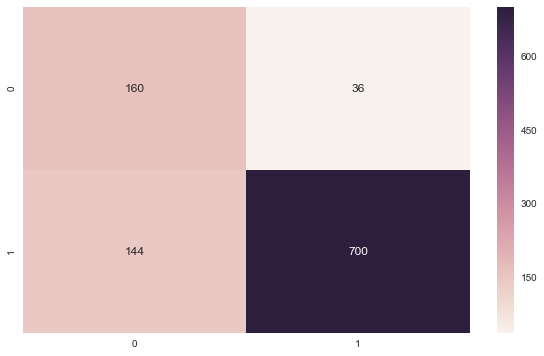

In [77]:
sns.heatmap(metrics.confusion_matrix(pred,y_test),annot=True,fmt='2.0f')

In [78]:
clf = RandomForestClassifier()
# Fit the classifier to the training data
clf.fit(tfidf_train, y_train)

# Create the predicted tags: pred
pred = clf.predict(tfidf_test)

# Calculate the accuracy score: score
score = metrics.accuracy_score(y_test, pred)
print('Accuracy is:',score)
f1 = metrics.f1_score(y_test, pred)
print('F score is:',f1)

('Accuracy is:', 0.8134615384615385)
('F score is:', 0.8764331210191083)


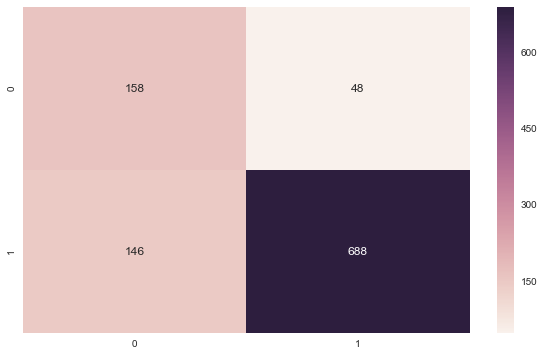

In [79]:
sns.heatmap(metrics.confusion_matrix(pred,y_test),annot=True,fmt='2.0f')

## Model Tuning

In [80]:
from sklearn.model_selection import GridSearchCV

clf = RandomForestClassifier()

scorer = metrics.make_scorer(metrics.fbeta_score, beta=0.5)

parameters = {'n_estimators': [112,115,118], 'max_features': [102,105,108], 'max_depth': [148,150,152],
              'min_samples_split':[3],'min_samples_leaf':[1]}

grid_obj = GridSearchCV(clf, parameters, scoring=scorer)

grid_fit = grid_obj.fit(X_new, y_train)

# Get the estimator
best_clf = grid_fit.best_estimator_

best_predictions = best_clf.predict(X_test_new)

score = metrics.accuracy_score(y_test, best_predictions)
print('Accuracy is:',score)
f1 = metrics.f1_score(y_test, best_predictions)
print('F score is:',f1)

/Users/jingchen/anaconda/lib/python2.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


('Accuracy is:', 0.8269230769230769)
('F score is:', 0.8856416772554002)


In [81]:
best_clf

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=148, max_features=102, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=3,
            min_weight_fraction_leaf=0.0, n_estimators=118, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

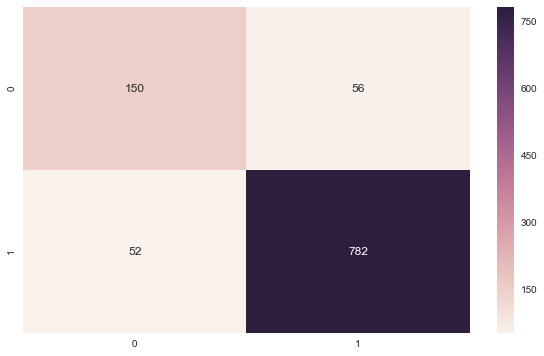

In [82]:
sns.heatmap(metrics.confusion_matrix(pred,best_predictions),annot=True,fmt='2.0f')

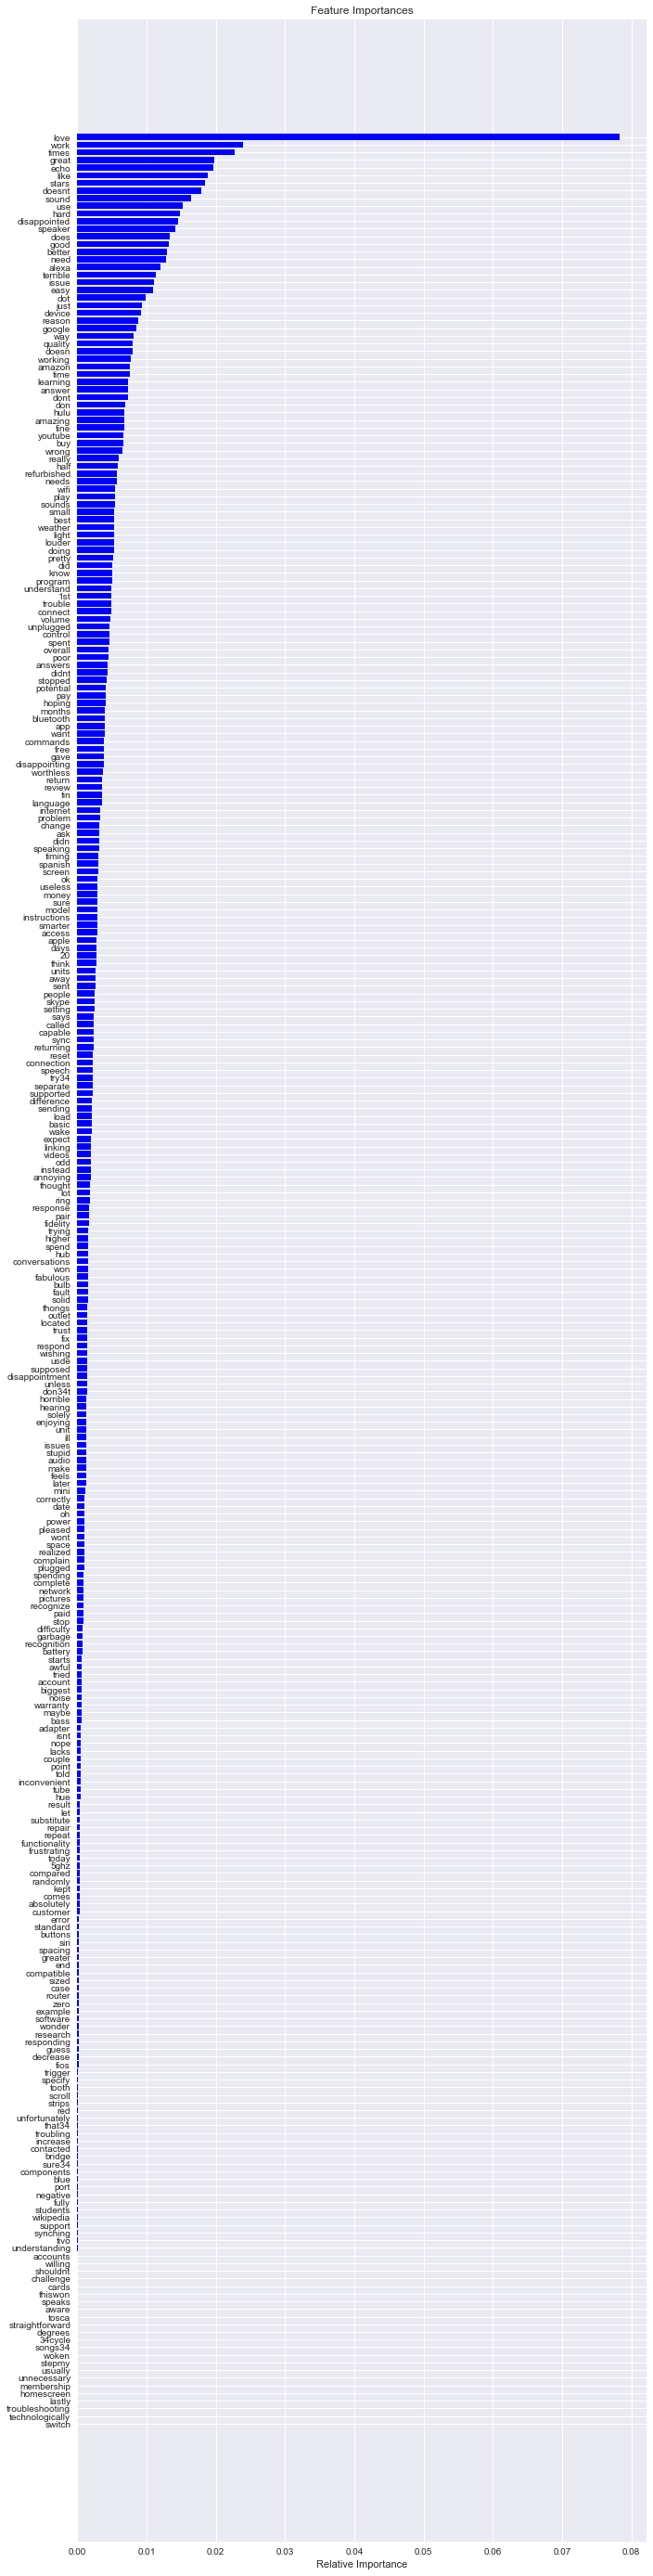

In [83]:
from itertools import compress

features = count_vectorizer.get_feature_names()
mask = ch2.get_support()
features = list(compress(features, mask))
importances = best_clf.feature_importances_
indices = np.argsort(importances)

sns.set(rc={'figure.figsize':(11,50)})

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [85]:
import eli5
from eli5.sklearn import PermutationImportance

X_test_new = X_test_new.toarray()

perm = PermutationImportance(best_clf, random_state=1).fit(X_test_new, y_test)
eli5.show_weights(perm, feature_names = features)

Weight,Feature
0.0421 ± 0.0132,love
0.0179 ± 0.0040,great
0.0129 ± 0.0093,work
0.0104 ± 0.0062,doesnt
0.0090 ± 0.0020,light
0.0088 ± 0.0026,speaker
0.0083 ± 0.0029,easy
0.0077 ± 0.0058,times
0.0058 ± 0.0024,disappointed
0.0054 ± 0.0060,stars


In [86]:
eli5.show_weights(perm, feature_names = features)

Weight,Feature
0.0421 ± 0.0132,love
0.0179 ± 0.0040,great
0.0129 ± 0.0093,work
0.0104 ± 0.0062,doesnt
0.0090 ± 0.0020,light
0.0088 ± 0.0026,speaker
0.0083 ± 0.0029,easy
0.0077 ± 0.0058,times
0.0058 ± 0.0024,disappointed
0.0054 ± 0.0060,stars
